In [2]:
import numpy as np
import matplotlib.pyplot as plt
from resnet.dataset import NIHDataset
import pickle
import pandas as pd

## Backbone -RCNN Evaluation

In [4]:
loss_path = "./resnet/losses/"

In [3]:
val_loss = np.load(loss_path + "resnext101_32x8d_val_loss_35.np.npy")
train_loss = np.load(loss_path + "resnext101_32x8d_train_loss_35.np.npy" )
assert len(val_loss) == len(train_loss)

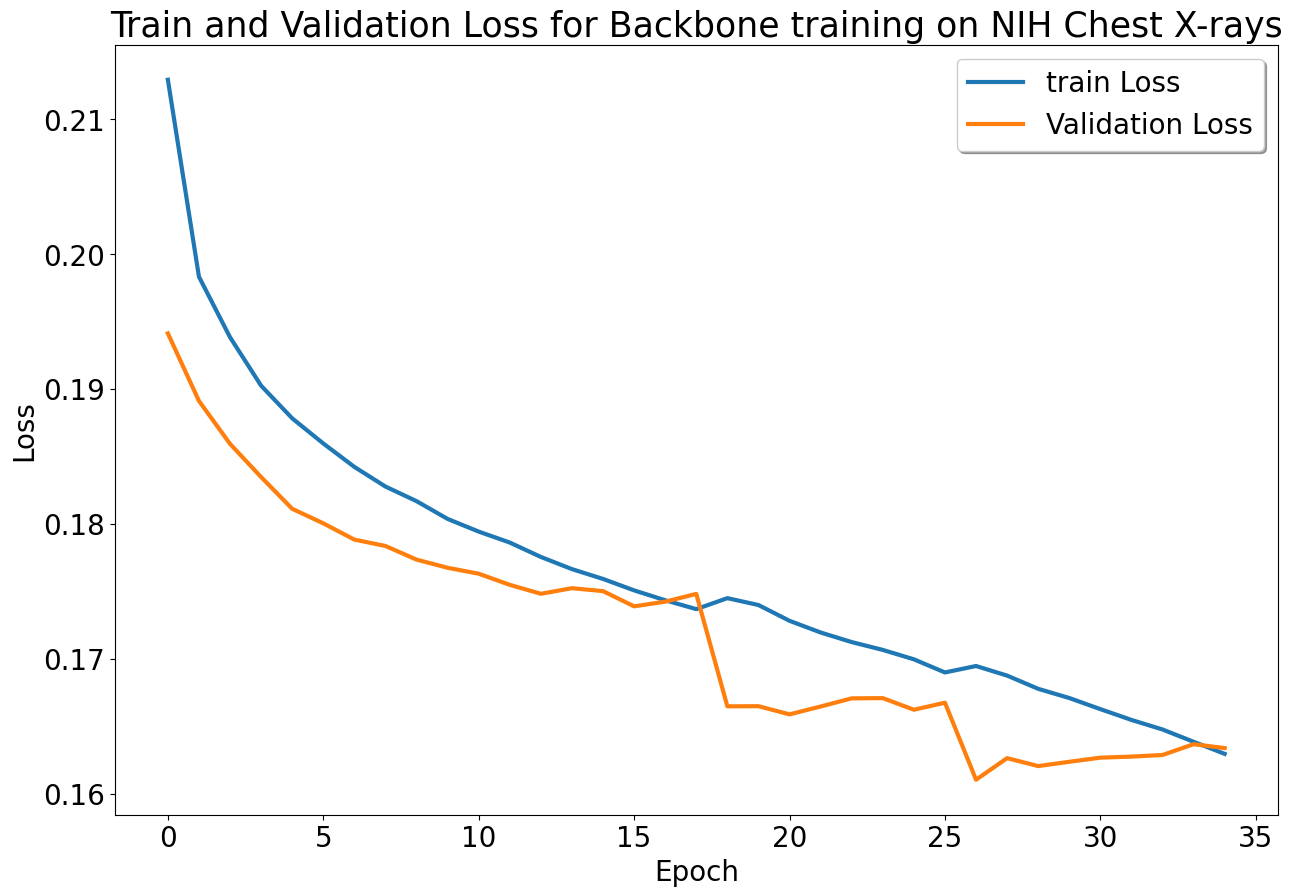

In [4]:
x = [i for i in range(len(val_loss))]

fig = plt.figure(figsize=(15,10))
plt.plot(x,train_loss , label="train Loss", linewidth=3)
plt.plot(x,val_loss, label="Validation Loss", linewidth=3)
plt.title("Train and Validation Loss for Backbone training on NIH Chest X-rays", fontsize=25)
plt.ylabel("Loss",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.legend(shadow=True, prop={'size': 20})
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
plt.show(block=True)
fig.savefig("../imgs/models/loss_backbone_rcnn_35.png",dpi=200)

In [5]:
with open(loss_path + '/resnext101_32x8d_general_test_results_35.pickle', 'rb') as f:
    test_results_general = pickle.load(f)

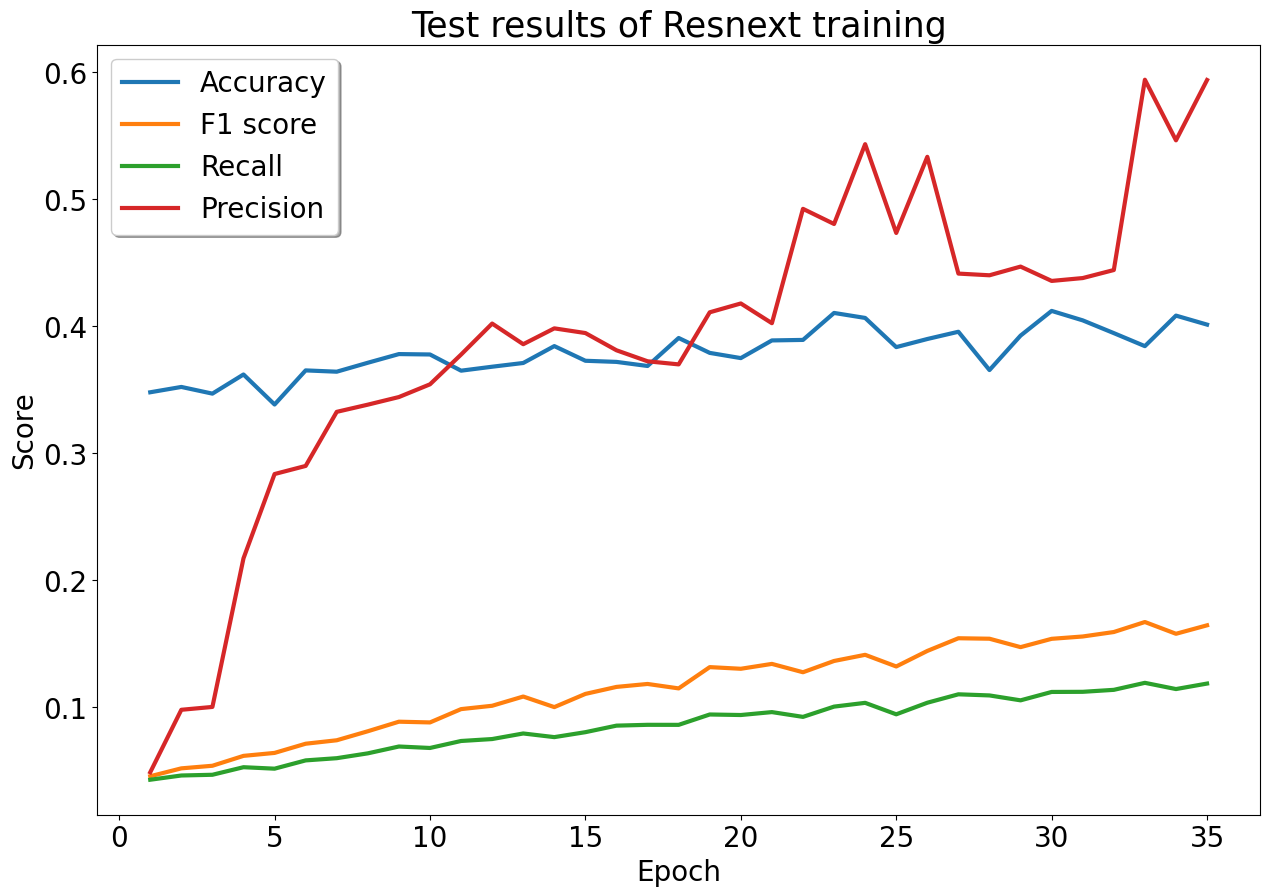

In [19]:
x = [i+1 for i in range(len(val_loss))]

accuracy = [a['accuracy'] for a in test_results_general]
f1 = [a['f1'] for a in test_results_general]
recall = [a['recall'] for a in test_results_general]
precision = [a['precision'] for a in test_results_general]

fig = plt.figure(figsize=(15,10))
plt.plot(x,accuracy, label="Accuracy", linewidth=3)
plt.plot(x,f1, label="F1 score", linewidth=3)
plt.plot(x,recall, label="Recall", linewidth=3)
plt.plot(x,precision, label="Precision", linewidth=3)
plt.title("Test results of Resnext training", fontsize=25)
plt.ylabel("Score",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.legend(shadow=True, prop={'size': 20})
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
plt.show(block=True)
fig.savefig("../imgs/models/test_results_backbone_rcnn_35.png",dpi=200)

In [5]:
rcnn_loss_path = "./rcnn/losses/"
train_loss = np.load(rcnn_loss_path + "fasterrcnn_train_loss_50.npy")
eval_stats = np.load(rcnn_loss_path + "fasterrcnn_eval_stats_50.npy")

In [6]:
loss_df = pd.DataFrame(data=train_loss, columns=["Loss sum", "Classifier loss", "Box Reg loss", "Objectness loss", "RPN Box Reg loss"])
eval_df = pd.DataFrame(data=eval_stats, columns=["AP50:95", "AP50", "AP75", "AP50:95small", "AP50:95medium", "AP50:95large", "AR50:95", "AR50", "AR75", "AR50:95small", "AR50:95medium", "AR50:95large"])

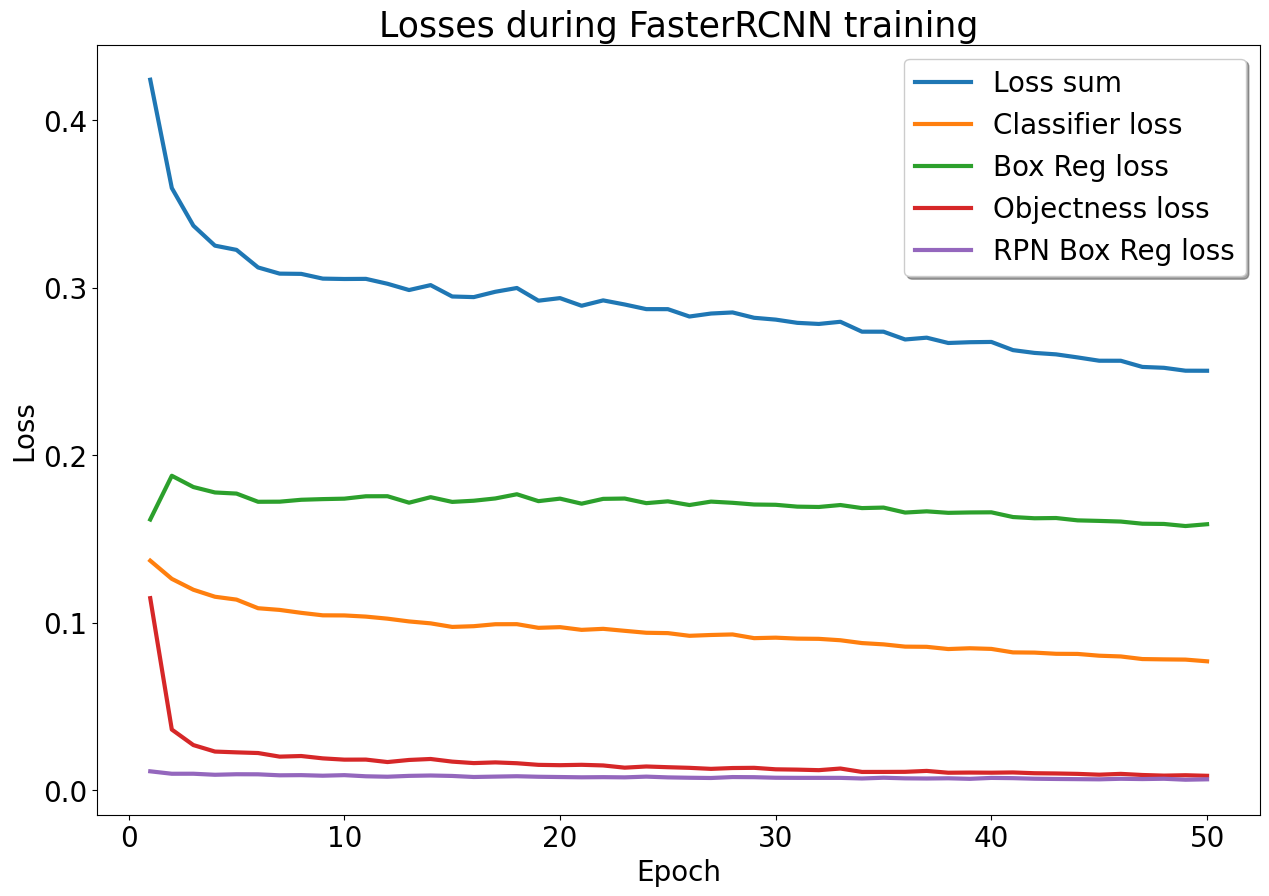

In [5]:
x = [i+1 for i in range(len(loss_df))]

fig = plt.figure(figsize=(15,10))
plt.plot(x, loss_df['Loss sum'], label="Loss sum", linewidth=3)
plt.plot(x, loss_df['Classifier loss'], label="Classifier loss", linewidth=3)
plt.plot(x, loss_df['Box Reg loss'], label="Box Reg loss", linewidth=3)
plt.plot(x, loss_df['Objectness loss'], label="Objectness loss", linewidth=3)
plt.plot(x, loss_df['RPN Box Reg loss'], label="RPN Box Reg loss", linewidth=3)
plt.legend(shadow=True, prop={'size': 20})
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
plt.title("Losses during FasterRCNN training", fontsize=25)
plt.ylabel("Loss",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.show(block=True)
fig.savefig("../imgs/models/loss_fasterrcnn_50.png",dpi=200)

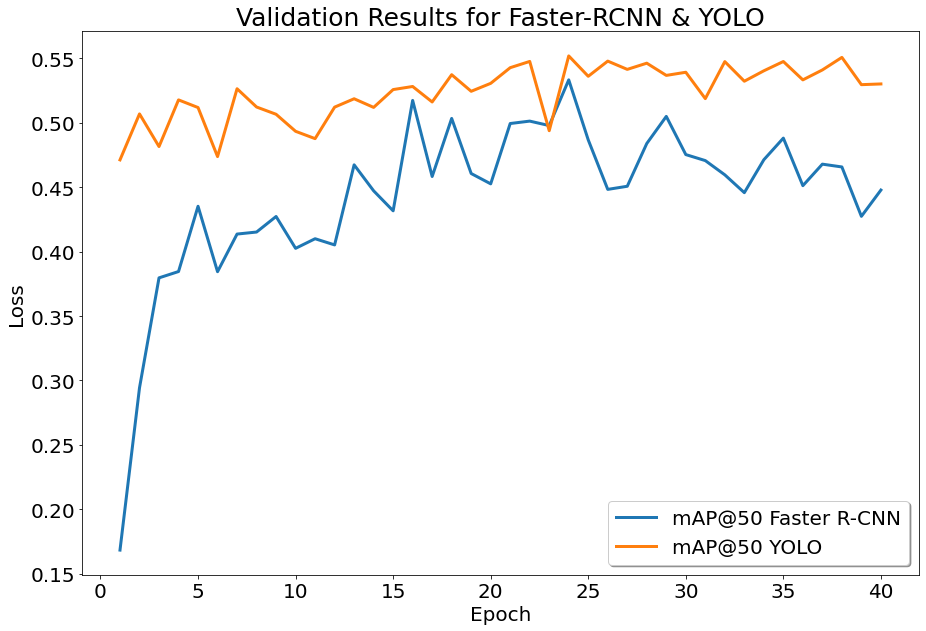

'\nplt.plot(x, eval_df[\'AR50\'], label="AR50", linewidth=3)\nplt.show(block=True)\nfig.savefig("../imgs/models/eval_results_fasterrcnn_50.png",dpi=200)\n'

In [10]:
file = open("./yolo/losses_final_giou_40/yolov5_general_test_results_39.pickle",'rb')
metrics_list = pickle.load(file)
file.close()

precision, recall, ap, f1, ap_class, ap50, mp, mr, map50 = [], [], [], [], [], [], [], [], []
for metrics in metrics_list:
    precision.append(metrics["precision"][0])
    recall.append(metrics["recall"][0])
    ap.append(metrics["ap"][0])
    f1.append(metrics["f1"][0])
    ap_class.append(metrics["ap_class"][0])
    ap50.append(metrics["ap50"][0])
    mp.append(metrics["mp"])
    mr.append(metrics["mr"])
    map50.append(metrics["map50"])


x = [i+1 for i in range(len(metrics_list))]

fig = plt.figure(figsize=(15,10))
plt.plot(x, eval_df['AP50'][:len(metrics_list)], label="mAP@50 Faster R-CNN", linewidth=3)
plt.plot(x,map50 , label="mAP@50 YOLO", linewidth=3)
plt.legend(shadow=True, prop={'size': 20})
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
plt.title("Validation Results for Faster-RCNN & YOLO", fontsize=25)
plt.ylabel("Loss",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.show(block=True)
fig.savefig("../imgs/models/eval_results_ap_only_fasterrcnn_yolo.png",dpi=200)

'''
plt.plot(x, eval_df['AR50'], label="AR50", linewidth=3)
plt.show(block=True)
fig.savefig("../imgs/models/eval_results_fasterrcnn_50.png",dpi=200)
'''